## Importing the image

In [1]:
# Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

(720, 1280, 3)

Converting to grayscale: 
(720, 1280)


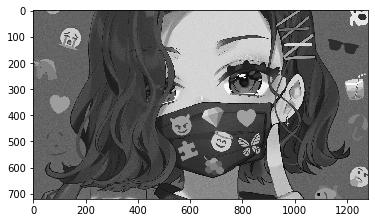

In [4]:
im = cv.imread('Data/WhatsApp Image 2020-05-07 at 23.08.59.jpeg')
print(im.shape)

print("\nConverting to grayscale: ")
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(im.shape)

plt.imshow(im, cmap='gray')
plt.show()

In [5]:
# The kernel for performing morphology
kernel = np.ones((5,5),np.uint8)

### 1. Erosion

In [6]:
erosion = cv.erode(im, kernel, iterations = 3)

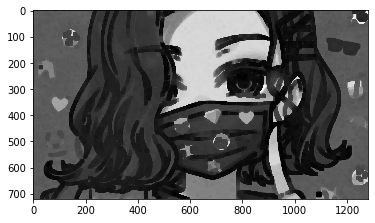

In [7]:
plt.imshow(erosion, cmap='gray')
plt.show()

### 2. Dilation

In [8]:
'''
The greater the number of iterations, the more pronounced the effect of the morphological operations will be
'''

dilation = cv.dilate(im, kernel, iterations = 3)

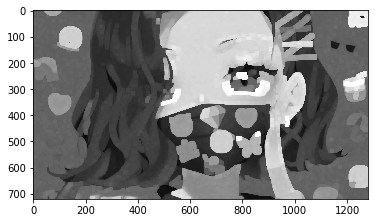

In [9]:
plt.imshow(dilation, cmap='gray')
plt.show()

### 3. Opening

In [10]:
opening = cv.morphologyEx(im, cv.MORPH_OPEN, kernel)

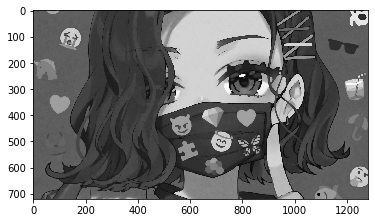

In [11]:
plt.imshow(opening, cmap='gray')
plt.show()

Removes a tiny amount of grains from the image

### 4. Closing

In [12]:
closing = cv.morphologyEx(im, cv.MORPH_CLOSE, kernel)

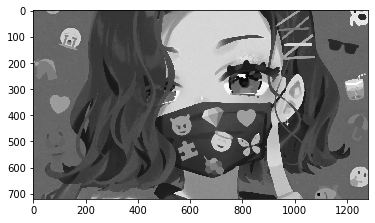

In [13]:
plt.imshow(closing, cmap='gray')
plt.show()

Fills up small holes/gaps in the image

## Adding Salt-Pepper Noise

In [14]:
import random

In [15]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

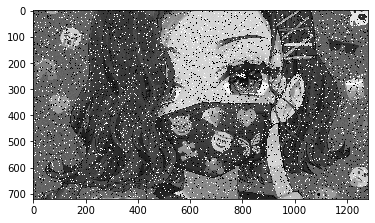

In [16]:
noise_img = sp_noise(im, 0.05)
plt.imshow(noise_img, cmap='gray')

### Opening + Closing to remove Salt-Pepper Noise
**Opening**

In [17]:
## To remove salt noise
opening = cv.morphologyEx(noise_img, cv.MORPH_OPEN, kernel)

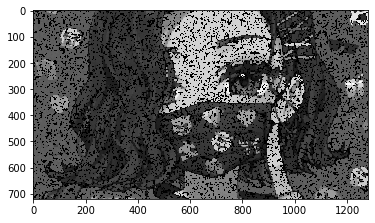

In [18]:
plt.imshow(opening, cmap='gray')
plt.show()

**Closing**

In [19]:
## To remove pepper noise
closing = cv.morphologyEx(noise_img, cv.MORPH_CLOSE, kernel)

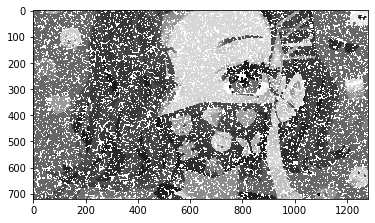

In [20]:
plt.imshow(closing, cmap='gray')
plt.show()

**Opening + Closing**

In [21]:
## To remove salt noise
opening = cv.morphologyEx(noise_img, cv.MORPH_OPEN, kernel)

## To remove pepper noise
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

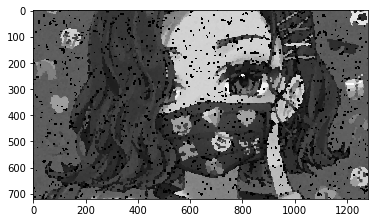

In [22]:
plt.imshow(closing, cmap='gray')
plt.show()

As we can see a lot of the noise has been removed

## Fingerprint

(406, 431, 3)

Converting to grayscale: 
(406, 431)


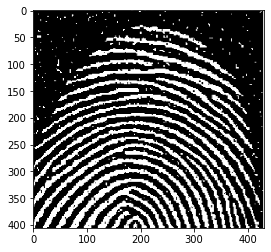

In [24]:
im_finger = cv.imread('Data/Fingerprint.png')
print(im_finger.shape)

print("\nConverting to grayscale: ")
im_finger = cv.cvtColor(im_finger, cv.COLOR_BGR2GRAY)
print(im_finger.shape)

plt.imshow(im_finger, cmap='gray')
plt.show()

In [25]:
## To remove salt noise
opening = cv.morphologyEx(im_finger, cv.MORPH_OPEN, kernel)

## To remove pepper noise
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

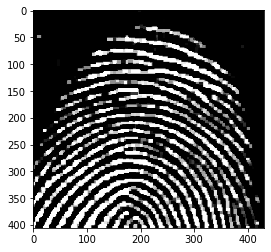

In [26]:
plt.imshow(closing, cmap='gray')
plt.show()

Less noisy image!